In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import os
print(os.getcwd())
print(os.listdir())

c:\Users\Rehan Ibrahim\OneDrive - HEC Paris\Desktop\Machine Learning 2 Project\Forest-Cover-Prediction
['.git', 'Data', 'Exploration.ipynb', 'First Try', 'README.md', 'submissions']


In [3]:
df = pd.read_csv("Data/train.csv")
print(df.shape)
df.dtypes

(15120, 56)


Id                                    int64
Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                      

In [4]:
df_test = pd.read_csv("Data/test-full.csv")
print(df_test.shape)
df_test.head()

(581012, 55)


,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,0
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,0
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,0
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,0
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_test.columns 

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

In [6]:
df.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

In [7]:
df.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,267008.526389,2748.649934,155.834524,16.556746,228.376521,51.311706,1717.977712,213.028836,218.865741,134.477116,...,0.043849,0.040939,0.001190,0.006812,0.000926,0.002116,0.049206,0.041931,0.030159,4.000000
std,179261.722330,419.009589,109.745372,8.534602,209.196381,61.520488,1330.263450,30.638406,22.797288,46.070054,...,0.204766,0.198156,0.034484,0.082257,0.030416,0.045957,0.216306,0.200439,0.171030,2.000066
min,5.000000,1877.000000,0.000000,0.000000,0.000000,-135.000000,0.000000,52.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,103705.000000,2373.000000,65.000000,10.000000,67.000000,5.000000,760.000000,197.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,276034.500000,2754.000000,125.000000,15.000000,180.000000,32.000000,1315.000000,220.000000,223.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,398150.250000,3109.000000,257.000000,22.000000,330.000000,80.000000,2292.000000,236.000000,235.000000,166.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,581005.000000,3850.000000,360.000000,50.000000,1376.000000,570.000000,6803.000000,254.000000,254.000000,251.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [8]:
df.Soil_Type1.value_counts()

0    14781
1      339
Name: Soil_Type1, dtype: int64

In [9]:
#Check for missing values
df.columns[df.isna().any()]

Index([], dtype='object')

In [10]:
#Check if soil types are mutually exclusive
soil_types = df.filter(regex="Soil_Type")
soil_types.sum().sum(), df.shape[0]

(15120, 15120)

### Converting to horizontal distance and vertical distance into total distance from water and amenities

Slope-Aspect Interaction: Create a new feature by multiplying the slope and aspect values to capture the interaction between these two variables. This can help to capture information about how the slope affects the amount of sunlight and wind exposure in different directions.

In [12]:
# Create a new feature for total distance to hydrology
df["Total_Distance_To_Hydrology"] = np.sqrt(df["Horizontal_Distance_To_Hydrology"]**2 + df["Vertical_Distance_To_Hydrology"]**2)
# Create a new feature for mean distance to amenities
df["Mean_Distance_To_Amenities"] = (df["Horizontal_Distance_To_Hydrology"] + df["Horizontal_Distance_To_Roadways"])/2
# Create a new feature for total hillshade
df["Total_Hillshade"] = df["Hillshade_9am"] + df["Hillshade_Noon"] + df["Hillshade_3pm"]
# Create a new feature called "slope_aspect_interaction"
df["slope_aspect_interaction"] = df["Slope"] * df["Aspect"]
# Define the edges of the bins
bin_edges = range(df["Elevation"].min(), df["Elevation"].max(), int((df["Elevation"].max() - df["Elevation"].min()) / 10))
# Create a new column for the binned Elevation values
df["Elevation_binned"] = pd.cut(df["Elevation"], bins=bin_edges)
import numpy as np
# Define bin edges for each 45-degree interval
bin_edges = np.array([0, 45, 90, 135, 180, 225, 270, 315, 360])
# Define bin labels for each 45-degree interval
bin_labels = ['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW']
# Convert aspect to categorical feature based on bin intervals
df['Aspect_cat'] = pd.cut(df['Aspect'], bins=bin_edges, labels=bin_labels, include_lowest=True)


In [13]:
df.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type39,Soil_Type40,Cover_Type,soil_types,Total_Distance_To_Hydrology,Mean_Distance_To_Amenities,Total_Hillshade,slope_aspect_interaction,Elevation_binned,Aspect_cat
0,242642,2881,130,22,210,54,1020,250,221,88,...,0,0,1,30,216.831732,615.0,559,2860,"(2862, 3059]",E
1,309891,3005,351,14,242,-16,1371,194,215,159,...,0,0,1,24,242.528349,806.5,568,4914,"(2862, 3059]",NW
2,287847,3226,63,14,618,2,1092,232,210,107,...,0,0,1,29,618.003236,855.0,549,882,"(3059, 3256]",NE
3,516307,3298,317,8,661,60,752,198,233,174,...,0,0,1,23,663.717560,706.5,605,2536,"(3256, 3453]",NW
4,124860,3080,35,6,175,26,3705,219,227,144,...,0,0,1,24,176.920886,1940.0,590,210,"(3059, 3256]",N


### group target by soil type
Not feasible because we are predicting a category

In [18]:
# Get the column names of the original categorical variables
original_cols = soil_types.columns

# Get the names of the new categorical variables
new_cols = [int(i[9:]) for i in soil_types.columns]

# Create a dictionary to map the original column names to the new categorical variables
mapping_dict = {col: new_col for col, new_col in zip(original_cols, new_cols)}

# Apply the mapping to the dataframe
df['soil_types'] = soil_types.idxmax(axis=1).map(mapping_dict)

# Drop the dummy encoded variables
#df = df.drop(original_cols, axis=1)
df.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type39,Soil_Type40,Cover_Type,soil_types,Total_Distance_To_Hydrology,Mean_Distance_To_Amenities,Total_Hillshade,slope_aspect_interaction,Elevation_binned,Aspect_cat
0,242642,2881,130,22,210,54,1020,250,221,88,...,0,0,1,30,216.831732,615.0,559,2860,"(2862, 3059]",E
1,309891,3005,351,14,242,-16,1371,194,215,159,...,0,0,1,24,242.528349,806.5,568,4914,"(2862, 3059]",NW
2,287847,3226,63,14,618,2,1092,232,210,107,...,0,0,1,29,618.003236,855.0,549,882,"(3059, 3256]",NE
3,516307,3298,317,8,661,60,752,198,233,174,...,0,0,1,23,663.717560,706.5,605,2536,"(3256, 3453]",NW
4,124860,3080,35,6,175,26,3705,219,227,144,...,0,0,1,24,176.920886,1940.0,590,210,"(3059, 3256]",N


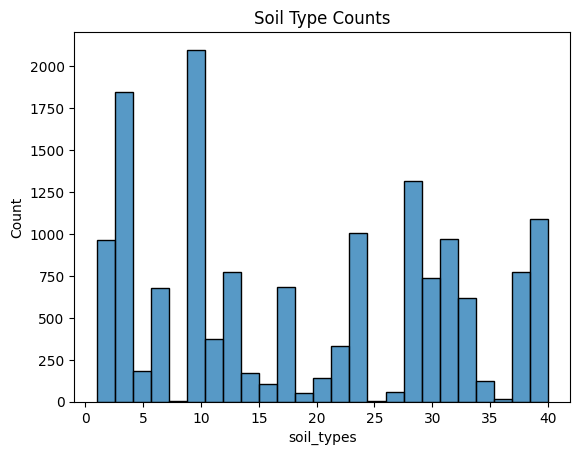

In [19]:
sns.histplot(df.soil_types).set(title="Soil Type Counts")
df.drop("soil_types", axis=1, inplace=True)

## Features Exploration

<AxesSubplot: >

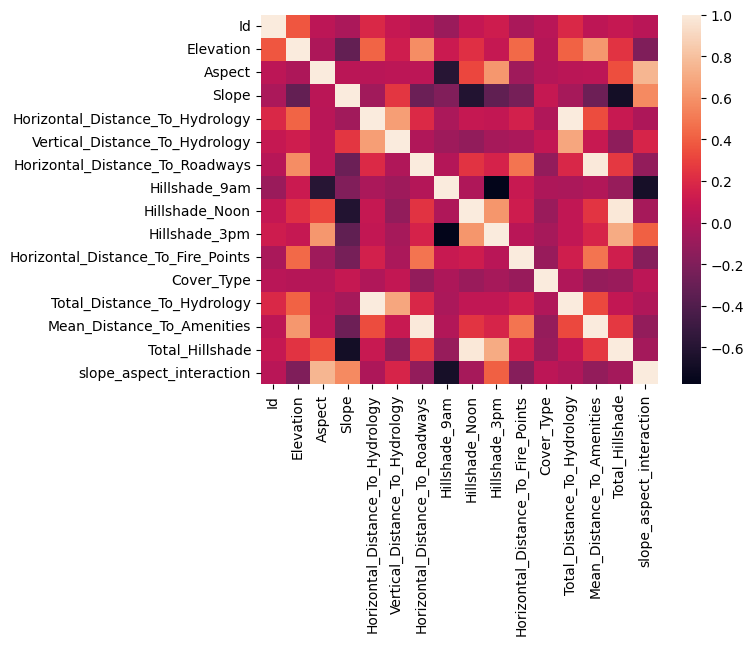

In [20]:
numeric_cols = df.select_dtypes(include=np.number)
numeric_cols = numeric_cols.loc[:, numeric_cols.nunique() > 2].columns
sns.heatmap(df[numeric_cols].corr())

In [21]:
#Mutual information to look at non-linear relationships
from sklearn.feature_selection import mutual_info_classif
mut_info = pd.Series(mutual_info_classif(df.drop("Cover_Type", axis=1),df["Cover_Type"]), 
                     index=df.drop("Cover_Type", axis=1).columns)

ValueError: Input contains NaN

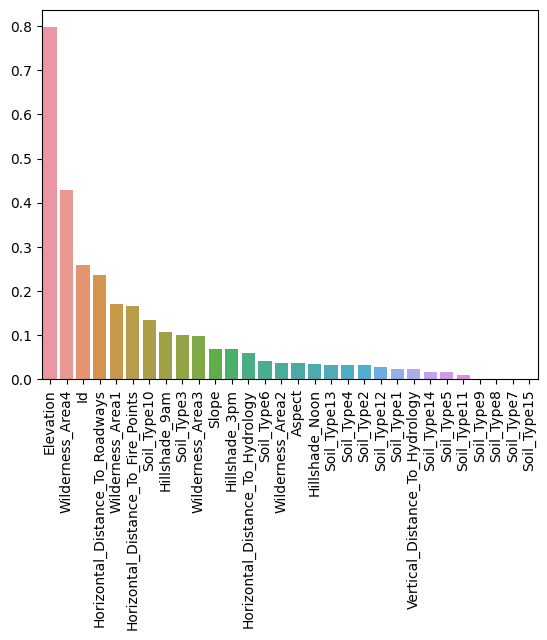

In [ ]:
mut_info_com = mut_info[:30].sort_values(ascending=False)
sns.barplot(x=mut_info_com.index, y=mut_info_com)
plt.xticks(rotation=90);

### Aspect Variable:
Aspect is measured in _degrees azimuth_.

The azimuth is the angle between North, measured clockwise around the observer's horizon, and a celestial body (sun, moon).

In [22]:
grouped = df.groupby("Cover_Type") 

pd.DataFrame({"mean":grouped["Aspect"].mean(),
               "std":grouped["Aspect"].std(),
               "mean/std":grouped["Aspect"].mean() / grouped["Aspect"].std()
               })

,mean,std,mean/std
Cover_Type,,,
1,155.886574,117.240246,1.329634
2,151.112500,108.654275,1.390764
3,173.583796,107.817029,1.609985
4,138.897685,87.484210,1.587689
5,138.058796,90.768030,1.521007
6,179.995833,132.967779,1.353680
7,153.306481,109.829269,1.395862


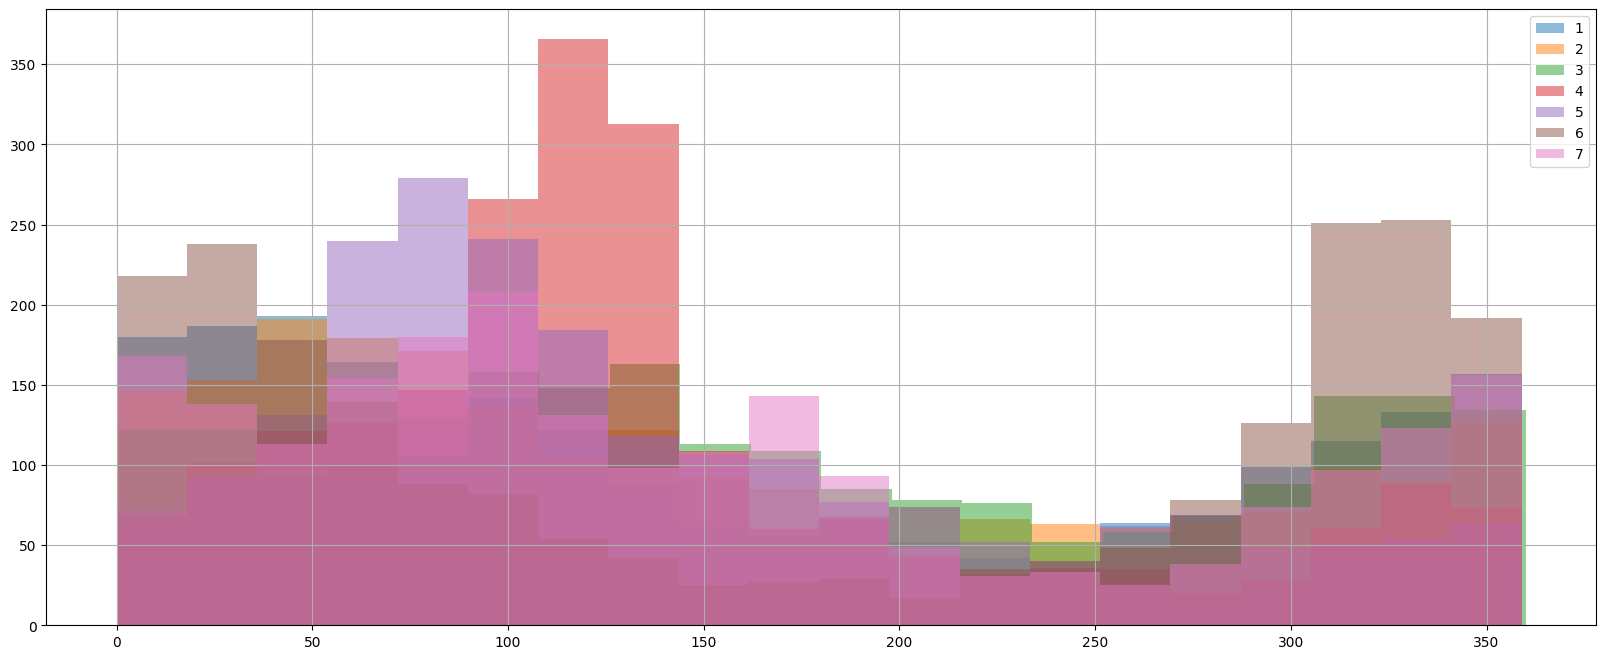

In [23]:
grouped["Aspect"].hist(alpha=0.5, figsize=(20,8), bins=20)
plt.legend(grouped.groups.keys())
plt.show()

## Encode data from soil type
In data description, there is data that is not available in the dataset that can be encoded. First digit of ELU represents climatic zone and second digit represents the geologic zone. We can do either of these two things: 
- Introduce two new categorical columns encoding this data by grouping all the variable with the same digits
- Encode this information in categorical variables somehow.

Detailed approach:
If we can find a main feature specific to the climatic zones and geologic zones, we can encode this. This can be temperature or something else.

### climatic zones:

https://en.wikipedia.org/wiki/Montane_ecosystems
 
- __Sierra Nevada lower montane forest -->__
Moving southward, the elevation range of the lower montane forest grows. Its elevation range at the northern end of the Sierra is from 1,200–5,500 feet (370–1,680 m). In the central Sierra, its elevation range is from 3,000–7,000 feet (910–2,130 m). In the southern end of the Sierra, its range is from 2,500–9,000 feet (760–2,740 m). __The daily high temperature in the summer is 80–90 °F (27–32 °C), while the daily lows in winter are around 28–34 °F (−2–1 °C)__. Annual precipitation depends on elevation: Yosemite Valley at 4,000 feet (1,200 m) gets 37 inches (940 mm) a year.

- __Bolivian montane dry forests -->__
Altitudes are from 360–700 metres (1,180–2,300 ft) above sea level. At a sample location at 18.75°S 65.25°W the Köppen climate classification is "Cwb": warm temperate, winter dry, warm summer. At this location the __mean monthly temperatures range from 13.5 °C (56.3 °F) in July to 18.8 °C (65.8 °F) in November__. Yearly total precipitation is about 580 millimetres (23 in). Average monthly precipitation is below 10 millimetres (0.39 in) in May–August, and rises to 137.4 millimetres (5.41 in) in January.

- __subalpine-->__
https://www.nps.gov/olym/learn/nature/subalpine-forests.htm#:~:text=The%20subalpine%20forest%20is%20a,too%20challenging%20for%20tree%20growth.

- __Northern transitional alpine forests-->__
It varies greatly in elevation from the heavily glacierized areas of the Hazelton and Skeena mountains between 2,500–2,800 m (8,200–9,200 ft), to the Nass and Skeena river valleys below 750 m (2,460 ft).
 In the west it has a warm humid continental climate (Köppen Dsb ) with warm summers and cold winters. In the east it has a subarctic climate (Köppen Dfc ) with cool summers and cold winters. Precipitation ranges from 2500mm (98.4 in) in the western coastal areas of the Nass River valley, to 600mm (23.6 in) in the lower elevations of the interior Bulkley Ranges. Temperature varies greatly with elevation, but averages around 13°C (55.4°F) in the summer and -9.5°C (14.9°F) in the winter.






In [24]:
df.Soil_Type1.value_counts()

0    14781
1      339
Name: Soil_Type1, dtype: int64

In [25]:
climatic_zone = {
            "lower_montane_dry":[],
            "lower_montane":[1,2,3,4,5,6],
            "montane_dry":[7,8],
            "montane":[9,10,11,12,13],
            "montane_dry_and_montane":[14,15],
            "montane_and_subalpine":[16,17,18],
            "subalpine":list(range(19,35)),
            "alpine":[35,36,37,38,39,40]
                 }

geologic_zones = {
          "alluvium":[14,15,16,17,19,20,21],
          "glacial":[9,22,23],
          "shale":[],
          "sandstone":[],
          "mixed_sedimentary":[7,8],
          "unspecified":[], 
          "igneous_metamorphic":[item for sublist in [list((range(1,7))), list(range(10,14)), [18], list(range(24,41))] for item in sublist],
          "volcanic":[]
          }

#verify their length
length = 0
for i in climatic_zone.values():
     length += len(i)
print(length)

length = 0
for i in geologic_zones.values():
     length += len(i)
print(length)
                 

40
40


### For wilderness areas, we have:
- 1 -- Rawah Wilderness Area
- 2 -- Neota Wilderness Area
- 3 -- Comanche Peak Wilderness Area
- 4 -- Cache la Poudre Wilderness Area

We can encode the coordinates (or some other external property from these areas) to the feature (average temperature?)

In [26]:
df.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

In [31]:
X = df.drop("Cover_Type",axis=1)
y = df.Cover_Type
df.dtypes``

Id                                     int64
Elevation                              int64
Aspect                                 int64
Slope                                  int64
Horizontal_Distance_To_Hydrology       int64
                                      ...   
Mean_Distance_To_Amenities           float64
Total_Hillshade                        int64
slope_aspect_interaction               int64
Elevation_binned                    category
Aspect_cat                          category
Length: 62, dtype: object

In [43]:
df[['Elevation_binned', 'Aspect_cat']]

,Elevation_binned,Aspect_cat
0,"(2862, 3059]",E
1,"(2862, 3059]",NW
2,"(3059, 3256]",NE
3,"(3256, 3453]",NW
4,"(3059, 3256]",N
...,...,...
15115,"(3256, 3453]",NW
15116,"(3453, 3650]",N
15117,"(3256, 3453]",NE
15118,"(3453, 3650]",NW


In [44]:
from sklearn.preprocessing import LabelEncoder

# create a label encoder object
encoder = LabelEncoder()

# encode the 'Elevation_binned' column
df['Elevation_binned_encoded'] = encoder.fit_transform(df['Elevation_binned'])
df.drop('Elevation_binned',axis=1,inplace=True)

# encode the 'Aspect_cat' column
df['Aspect_cat_encoded'] = encoder.fit_transform(df['Aspect_cat'])
df.drop('Aspect_cat',axis=1,inplace=True)

### Target Variable

In [28]:
y.value_counts()

1    2160
2    2160
3    2160
4    2160
5    2160
6    2160
7    2160
Name: Cover_Type, dtype: int64

Classes of equal length

### Dummy Classification

In [33]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
X = df.copy()
y = X.pop("Cover_Type")

model = DecisionTreeClassifier()
kf = KFold()
accuracies = []
for i, (train_index, test_index) in enumerate(kf.split(X)):
    model.fit(X.loc[train_index], y[train_index])
    yhat = model.predict(X.loc[test_index])
    accuracies.append(f1_score(y[test_index],yhat, average="macro"))
print(f"mean accuracy = {sum(accuracies)/len(accuracies)}")
    

mean accuracy = 0.16383630250284434


Best params so far:
- learning rate = 0.3
- max_depth = 11

In [34]:
pipe.get_params()

NameError: name 'pipe' is not defined

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV


pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("model", GradientBoostingClassifier())
        ])

params = {
           #"model__learning_rate":[0.2, 0.3, 0.4],
           #"model__max_depth":[9,11],
           "model__learning_rate":[0.3],
           "model__max_depth":[11],
           #"model__max_features:":["auto", "None"],
           "model__min_samples_leaf":[1,4,7],
           "model__min_samples_split":[2,5,8]
        }


search2 = GridSearchCV(pipe, params, cv=3, n_jobs=2, verbose=3) 

search2.fit(X, y)

print("best params: ", search2.best_params_)

y_pred = search2.predict(df_test)


Fitting 3 folds for each of 9 candidates, totalling 27 fits


ValueError: 
All the 27 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
27 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Rehan Ibrahim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Rehan Ibrahim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py", line 401, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "c:\Users\Rehan Ibrahim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py", line 359, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "c:\Users\Rehan Ibrahim\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
  File "c:\Users\Rehan Ibrahim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py", line 893, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "c:\Users\Rehan Ibrahim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\_set_output.py", line 140, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "c:\Users\Rehan Ibrahim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 881, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
  File "c:\Users\Rehan Ibrahim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_data.py", line 824, in fit
    return self.partial_fit(X, y, sample_weight)
  File "c:\Users\Rehan Ibrahim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_data.py", line 861, in partial_fit
    X = self._validate_data(
  File "c:\Users\Rehan Ibrahim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 565, in _validate_data
    X = check_array(X, input_name="X", **check_params)
  File "c:\Users\Rehan Ibrahim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "c:\Users\Rehan Ibrahim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "c:\Users\Rehan Ibrahim\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\generic.py", line 2070, in __array__
    return np.asarray(self._values, dtype=dtype)
TypeError: float() argument must be a string or a real number, not 'pandas._libs.interval.Interval'


In [68]:
df.columns[~df.columns.isin(df_test.columns)]

Index(['Cover_Type'], dtype='object')

In [92]:
#submission
sub = pd.read_csv("Data/full_submission.csv")
sub["Cover_Type"] = y_pred
sub.to_csv("submission3.csv", index=False)
sub

,Id,Cover_Type
0,1,5
1,2,5
2,3,2
3,4,2
4,5,5
...,...,...
581007,581008,3
581008,581009,3
581009,581010,3
581010,581011,3


In [94]:
sub["Cover_Type"].value_counts()

2    250436
1    213038
3     37364
7     29576
5     24314
6     22544
4      3740
Name: Cover_Type, dtype: int64

# Tpot Predictions

In [55]:
import tpot
X = df.copy()
y = X.pop("Cover_Type")

model = tpot.TPOTClassifier(generations=5, population_size=10, cv=3, verbosity=3, n_jobs=3)
model.fit(X,y)

32 operators have been imported by TPOT.


Optimization Progress:   0%|          | 0/60 [00:00<?, ?pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 l2 was provided as affinity. Ward can only work with euclidean distances..
_pre_test decorator: _random_mutation_operator: num_test=0 Solver lbfgs supports only dual=False, got dual=True.

Generation 1 - Current Pareto front scores:

-1	0.7292328042328041	KNeighborsClassifier(input_matrix, KNeighborsClassifier__n_neighbors=21, KNeighborsClassifier__p=2, KNeighborsClassifier__weights=distance)

-2	0.784589947089947	ExtraTreesClassifier(SelectFwe(input_matrix, SelectFwe__alpha=0.049), ExtraTreesClassifier__bootstrap=True, ExtraTreesClassifier__criterion=gini, ExtraTreesClassifier__max_features=0.6000000000000001, ExtraTreesClassifier__min_samples_leaf=17, ExtraTreesClassifier__min_samples_split=18, ExtraTreesClassifier__n_estimators=100)
_pre_test decorator: _random_mutation_operator: num_test=0 (slice(None, None, None), 0).
_pre_test decorator: _random_mutation_operator: num_test=0 Invalid classes inferred from unique values of 

TPOTClassifier(cv=3, generations=5, n_jobs=3, population_size=10, verbosity=3)

In [ ]:
y_pred = model.predict(X_test)
print(classification_report(y_pred, y_test))